In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import dataframe_image as dfi 

In [2]:
economic_df = pd.read_csv("economic-data.csv")
covid_df = pd.read_csv("covid-data.csv")
population_df = pd.read_csv("population_data.csv")
population_df;

economic_df

,index,Location,Stringency Index,Population Density,Median Age,Aged 65 and Older,Aged 70 and Older,GDP Per Capita,Extreme Poverty,Cardiovascular Death Rate,Diabetes Prevalence,Handwasing Facilities,Hospital Beds Per Thousand,Life Expectancy,Human Development Index
0,0,Afghanistan,41.886694,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.500,64.83,0.511
1,1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Albania,63.921617,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,NaN,2.890,78.57,0.795
3,3,Algeria,70.942642,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,83.741,1.900,76.88,0.748
4,4,Andorra,47.457068,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,Vietnam,61.129332,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,85.847,2.600,75.40,0.704
211,211,World,NaN,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,60.130,2.705,72.58,0.737
212,212,Yemen,34.253453,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,49.542,0.700,66.12,0.470
213,213,Zambia,46.804551,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,13.938,2.000,63.89,0.584


In [3]:
target_pop_df = population_df.loc[population_df["Location"].isin(["Australia", "New Zealand", "Brazil", "United States", "South Africa", "France", "Saudi Arabia", "India", "Japan", "Egypt"]), :]

target_pop_df_copy = target_pop_df.sort_values("Density (P/Km²)", ascending=False)

target_pop_df

,Location,Density (P/Km²),Land Area (Km²),Med. Age,Urban Pop %,World Share
1,India,464,2973190,28,35 %,17.70 %
2,United States,36,9147420,38,83 %,4.25 %
5,Brazil,25,8358140,33,88 %,2.73 %
10,Japan,347,364555,48,92 %,1.62 %
13,Egypt,103,995450,25,43 %,1.31 %
21,France,119,547557,42,82 %,0.84 %
24,South Africa,49,1213090,28,67 %,0.76 %
40,Saudi Arabia,16,2149690,32,84 %,0.45 %
54,Australia,3,7682300,38,86 %,0.33 %
125,New Zealand,18,263310,38,87 %,0.06 %


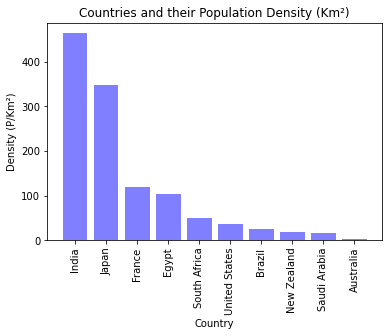

In [29]:
x_axis = np.arange(len(target_pop_df))
plt.bar(x_axis, target_pop_df_copy["Density (P/Km²)"], color='b', alpha=0.5)
plt.xticks(x_axis, target_pop_df_copy["Location"], rotation="vertical")
plt.xlabel("Country")
plt.ylabel("Density (P/Km²)")
plt.title("Countries and their Population Density (Km²)")

In [5]:
transmission = covid_df.groupby(["Transmission Classification"])
transmission = transmission.sum()
transmission

,Cases - cumulative total,Deaths - cumulative total,Population (2020)
Transmission Classification,,,
Clusters of cases,23770946,449141,1.190868e+09
Community transmission,93076285,2149242,5.125073e+09
No cases,918,25,4.601550e+05
Not applicable,745,13,1.152310e+05
Pending,14369,114,3.437842e+06
Sporadic cases,468999,6821,4.819705e+07


In [6]:
transmission_class = transmission.drop(['No cases','Not applicable','Pending'])

transmission_class = transmission_class.reset_index()

transmission_class

,Transmission Classification,Cases - cumulative total,Deaths - cumulative total,Population (2020)
0,Clusters of cases,23770946,449141,1.190868e+09
1,Community transmission,93076285,2149242,5.125073e+09
2,Sporadic cases,468999,6821,4.819705e+07


Text(0.5, 1.0, ' Transmission Type of COVID-19 and Total Number of Deaths for all Countries')

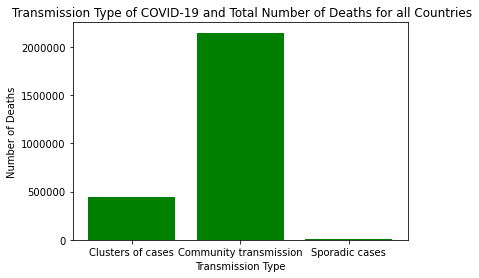

In [7]:
x_axis = np.arange(len(transmission_class))

deaths = plt.bar(x_axis, transmission_class["Deaths - cumulative total"], color='g', label="Deaths") 

plt.ticklabel_format(style='plain')

plt.xticks(x_axis, transmission_class["Transmission Classification"], rotation="horizontal")

plt.xlabel("Transmission Type")
plt.ylabel("Number of Deaths")
plt.title(" Transmission Type of COVID-19 and Total Number of Deaths for all Countries")

In [9]:
target_covid_df = covid_df.loc[[0,1,2,5,15,38,41,65,114,180], :]
target_covid_df

,Location,Cases - cumulative total,Deaths - cumulative total,Transmission Classification,Population (2020)
0,United States of America,28825174,522469,Community transmission,1.382345e+09
1,India,11262707,158063,Clusters of cases,3.313410e+08
2,Brazil,11051665,266398,Community transmission,2.740216e+08
5,France,3864335,88813,Community transmission,2.069843e+08
15,South Africa,1522697,50906,Community transmission,8.449524e+07
38,Japan,441279,8353,Clusters of cases,3.698562e+07
41,Saudi Arabia,380572,6539,Sporadic cases,3.305021e+07
65,Egypt,187716,11082,Clusters of cases,1.768860e+07
114,Australia,29061,909,Clusters of cases,5.542237e+06
180,New Zealand,2054,26,Clusters of cases,2.999580e+05


In [10]:
target_covid_df = target_covid_df.drop(columns={"Cases - cumulative total", "Population (2020)"})
target_covid_df

,Location,Deaths - cumulative total,Transmission Classification
0,United States of America,522469,Community transmission
1,India,158063,Clusters of cases
2,Brazil,266398,Community transmission
5,France,88813,Community transmission
15,South Africa,50906,Community transmission
38,Japan,8353,Clusters of cases
41,Saudi Arabia,6539,Sporadic cases
65,Egypt,11082,Clusters of cases
114,Australia,909,Clusters of cases
180,New Zealand,26,Clusters of cases


In [11]:
target_covid_df = target_covid_df.sort_values("Deaths - cumulative total", ascending=False)
target_covid_df

,Location,Deaths - cumulative total,Transmission Classification
0,United States of America,522469,Community transmission
2,Brazil,266398,Community transmission
1,India,158063,Clusters of cases
5,France,88813,Community transmission
15,South Africa,50906,Community transmission
65,Egypt,11082,Clusters of cases
38,Japan,8353,Clusters of cases
41,Saudi Arabia,6539,Sporadic cases
114,Australia,909,Clusters of cases
180,New Zealand,26,Clusters of cases


In [30]:
# dfi.export(target_covid_df, "transmission_type_and_deaths.png")

In [13]:
deaths_v_hdi = target_covid_df.drop(columns={"Transmission Classification"})

In [14]:
target_economic_df = economic_df.loc[[11, 27, 56, 69, 89, 99, 139, 169, 179, 204]]
target_economic_df = target_economic_df.filter(items=['Location', 'Stringency Index'])
target_economic_df

,Location,Stringency Index
11,Australia,59.195711
27,Brazil,67.478076
56,Egypt,61.041832
69,France,59.383463
89,India,68.149233
99,Japan,36.803985
139,New Zealand,37.979394
169,Saudi Arabia,63.684146
179,South Africa,59.268817
204,United States,61.212500


In [15]:
target_economic_df.at[204, 'Location'] = 'United States of America'
target_economic_df

,Location,Stringency Index
11,Australia,59.195711
27,Brazil,67.478076
56,Egypt,61.041832
69,France,59.383463
89,India,68.149233
99,Japan,36.803985
139,New Zealand,37.979394
169,Saudi Arabia,63.684146
179,South Africa,59.268817
204,United States of America,61.212500


In [16]:
deaths_v_hdi = pd.merge(deaths_v_hdi, target_economic_df, on="Location")
deaths_v_hdi

,Location,Deaths - cumulative total,Stringency Index
0,United States of America,522469,61.212500
1,Brazil,266398,67.478076
2,India,158063,68.149233
3,France,88813,59.383463
4,South Africa,50906,59.268817
5,Egypt,11082,61.041832
6,Japan,8353,36.803985
7,Saudi Arabia,6539,63.684146
8,Australia,909,59.195711
9,New Zealand,26,37.979394


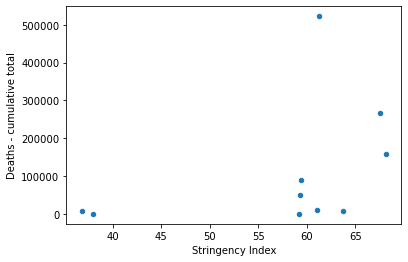

In [24]:
plot = deaths_v_hdi.plot.scatter(x='Stringency Index', y='Deaths - cumulative total')